In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib
from time import sleep

In [2]:
# returns list of all score points given game id
def get_one_game_scores(id):
    f = urllib.request.urlopen(f'https://www.espn.com/nba/playbyplay?gameId={id}')
    pbp_source = f.read().decode('utf-8')
    #times = re.findall('time-stamp">([^;]*?)<', pbp_source)
    one_game_scores = re.findall('combined-score">([^;]*?)<', pbp_source)
    temp_df = pd.DataFrame(data=one_game_scores, columns=['scores'])
    return list(temp_df['scores'].unique())

In [3]:
one_game_score = get_one_game_scores(401267521)
# one_game_score #visiting - home

In [4]:
# pbp: where the scores r
# https://www.espn.com/nba/playbyplay?gameId=401267511
# most easily accessible page:
# https://www.espn.com/nba/game?gameId=401267511

In [5]:
def get_all_game_ids_on_day(date):
    f = urllib.request.urlopen(f'https://www.espn.com/nba/schedule/_/date/{date}')
    game_ids_source = f.read().decode('utf-8')
    game_ids = re.findall('\?gameId=([^;]*?)"', game_ids_source)
    return game_ids

In [6]:
# https://www.espn.com/nba/schedule/_/date/20210205

In [7]:
# all days of week (monday - sun) are posted on same page
# so only get game ids for mondays

In [8]:
def get_all_game_scores_given_monday(date):
    game_ids = get_all_game_ids_on_day(date)
    weekly_scores = []
    for game_id in game_ids:
        weekly_scores = weekly_scores + get_one_game_scores(game_id)
    return weekly_scores

In [9]:
# all_scores_0201_ = get_all_game_scores_given_monday(20210201)

In [10]:
def get_all_scores_given_monday_list(list_of_mondays):
    all_scores = []
    for monday in list_of_mondays:
        all_scores = all_scores + get_all_game_scores_given_monday(monday)
    return all_scores

In [11]:
def allmondays(start, end):
    return pd.date_range(start=start, end=end, 
                         freq='W-MON').strftime('%Y%m%d').tolist()

In [12]:
data = get_all_scores_given_monday_list(allmondays('12/21/2020', '02/01/2021'))
data

['0 - 0',
 '2 - 0',
 '3 - 0',
 '6 - 0',
 '6 - 3',
 '8 - 3',
 '9 - 3',
 '9 - 5',
 '11 - 5',
 '11 - 7',
 '11 - 10',
 '14 - 10',
 '14 - 12',
 '16 - 12',
 '18 - 12',
 '20 - 12',
 '20 - 14',
 '20 - 15',
 '20 - 18',
 '21 - 18',
 '22 - 18',
 '22 - 20',
 '22 - 23',
 '24 - 23',
 '26 - 23',
 '28 - 23',
 '30 - 23',
 '32 - 23',
 '32 - 26',
 '34 - 26',
 '34 - 28',
 '36 - 28',
 '38 - 28',
 '38 - 31',
 '41 - 31',
 '42 - 31',
 '42 - 33',
 '44 - 33',
 '46 - 33',
 '48 - 33',
 '48 - 35',
 '49 - 35',
 '50 - 35',
 '52 - 35',
 '53 - 35',
 '53 - 37',
 '56 - 37',
 '56 - 39',
 '58 - 39',
 '58 - 41',
 '60 - 41',
 '60 - 42',
 '60 - 43',
 '60 - 44',
 '61 - 44',
 '62 - 44',
 '62 - 47',
 '62 - 49',
 '62 - 51',
 '62 - 53',
 '64 - 53',
 '64 - 55',
 '66 - 55',
 '68 - 55',
 '68 - 56',
 '68 - 57',
 '68 - 58',
 '68 - 59',
 '68 - 60',
 '70 - 60',
 '70 - 62',
 '70 - 63',
 '70 - 64',
 '72 - 64',
 '74 - 64',
 '76 - 64',
 '76 - 67',
 '78 - 67',
 '78 - 69',
 '79 - 69',
 '80 - 69',
 '80 - 70',
 '82 - 70',
 '82 - 72',
 '82 - 74'

In [13]:
len(data)

4284

In [20]:
test = pd.DataFrame(data=data, columns=['score'])
#test = pd.concat([test, lol_df])
test['visiting'] = [i[0] for i in test['score'].str.split(' - ')]
test['home'] = [i[1] for i in test['score'].str.split(' - ')]
test['visiting'] = test['visiting'].astype(int)
test['home'] = test['home'].astype(int)
# fig, ax = plt.subplots(figsize=[12, 12])
# ax = sns.scatterplot(data=test, x='home', y='visiting')
test

,score,visiting,home
0,0 - 0,0,0
1,2 - 0,2,0
2,3 - 0,3,0
3,6 - 0,6,0
4,6 - 3,6,3
...,...,...,...
4279,110 - 111,110,111
4280,110 - 112,110,112
4281,110 - 113,110,113
4282,111 - 113,111,113


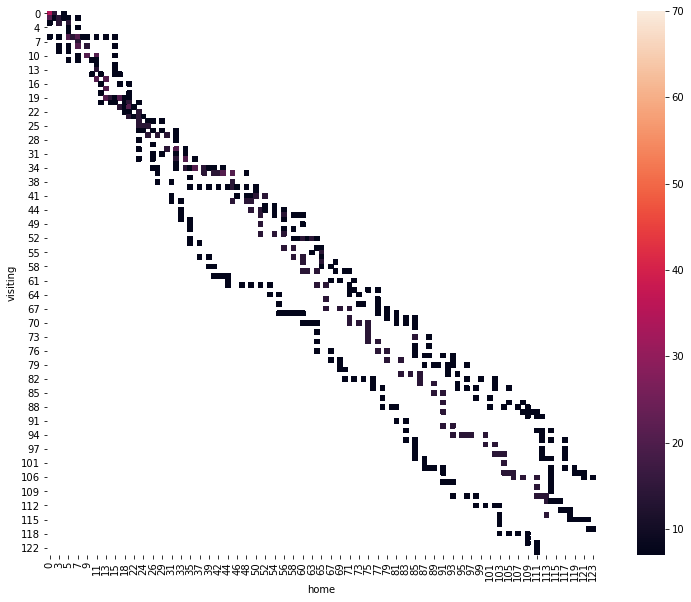

In [15]:
fig, ax = plt.subplots(figsize=[15, 10])
no_score = test[['visiting', 'home']]
no_score['count'] = np.ones(len(no_score))
grouped = no_score.groupby(['visiting', 'home'], as_index=False).sum().pivot('visiting', 'home', 'count')
ax = sns.heatmap(grouped, vmax=70, square=True)

In [16]:
no_score.groupby(['visiting', 'home'], as_index=False).sum().pivot('visiting', 'home')

count                                              ...              \
home       0     2     3    4     5   6    7   8   9   10   ... 114 115 116   
visiting                                                    ...               
0         35.0  14.0   NaN  7.0   NaN NaN  NaN NaN NaN NaN  ... NaN NaN NaN   
2         21.0   7.0  14.0  7.0   7.0 NaN  7.0 NaN NaN NaN  ... NaN NaN NaN   
3          7.0   NaN  14.0  NaN  14.0 NaN  NaN NaN NaN NaN  ... NaN NaN NaN   
4          NaN   NaN   NaN  NaN   7.0 NaN  7.0 NaN NaN NaN  ... NaN NaN NaN   
5          NaN   NaN   NaN  NaN   7.0 NaN  NaN NaN NaN NaN  ... NaN NaN NaN   
...        ...   ...   ...  ...   ...  ..  ...  ..  ..  ..  ...  ..  ..  ..   
118        NaN   NaN   NaN  NaN   NaN NaN  NaN NaN NaN NaN  ... NaN NaN NaN   
120        NaN   NaN   NaN  NaN   NaN NaN  NaN NaN NaN NaN  ... NaN NaN NaN   
121        NaN   NaN   NaN  NaN   NaN NaN  NaN NaN NaN NaN  ... NaN NaN NaN   
122        NaN   NaN   NaN  NaN   NaN NaN  NaN NaN NaN NaN  ... NaN NaN NaN   
123        NaN   NaN   NaN  NaN   NaN NaN  NaN NaN NaN NaN  ... NaN NaN NaN   

                                      
home     117 118 119 120 121 122 123  
visiting                              
0        NaN NaN NaN NaN NaN NaN NaN  
2        NaN NaN NaN NaN NaN NaN NaN  
3        NaN NaN NaN NaN NaN NaN NaN  
4        NaN NaN NaN NaN NaN NaN NaN  
5        NaN NaN NaN NaN NaN NaN NaN  
...       ..  ..  ..  ..  ..  ..  ..  
118      NaN NaN NaN NaN NaN NaN NaN  
120      NaN NaN NaN NaN NaN NaN NaN  
121      NaN NaN NaN NaN NaN NaN NaN  
122      NaN NaN NaN NaN NaN NaN NaN  
123      NaN NaN NaN NaN NaN NaN NaN  

[116 rows x 117 columns]

In [17]:
counts = no_score.groupby(['visiting', 'home'], as_index=False).sum().sort_values('count', ascending=False).head(50)

In [18]:
counts.sort_values(['visiting', 'home'])

,visiting,home,count
0,0,0,35.0
3,2,0,21.0
17,6,5,21.0
19,6,7,21.0
28,8,7,21.0
34,10,9,21.0
35,10,11,21.0
49,15,11,21.0
50,15,13,21.0
54,17,13,21.0
